# **Data Scientist Employee Attrition - Job Change of data Scientists**

----------------------------
## **Problem Statement**
--------------------------
A company that is active in Big data and data Science wants to hire data scientists among people who successfully pass some courses conducted by the company. Many people sign up for their training. The company wants to know which of these candidates want to work for the company after training or looking for new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education and experience is provided by candidates during sign-up and enrollment.

This dataset is designed to understand the factors that lead a person to leave their current job, and it is hence useful for HR research. By building a model that uses the current credentials, demographics, and work experience related data, you will predict the probability that a candidate is looking for a new job, as well as interpret the main factors that affect an employee's decision whether to continue or attrite.

--------------------------
## **Data Description**
--------------------------
* **Enrollee_id:** Unique ID for candidate

* **City:** City code

* **City_development_index:** Development index of the city (scaled)

* **Gender:** Gender of candidate

* **Relevant_experience:** Relevant experience of candidate

* **Enrolled_university:** Type of University course enrolled if any

* **Education_level:** Education level of candidate

* **Major_discipline:** Education major discipline of candidate

* **Experience:** Candidate total experience in years

* **Company_size:** No of employees in current employer's company

* **Company_type:** Type of current employer

* **Last_new_job:** Difference in years between previous job and current job

* **Training_hours:** training hours completed

* **Target:** 0 – Not looking for job change, 1 – Looking for a job change

### **Mount the drive**
Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# Mounting the Library
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing the necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot


from sklearn.metrics import roc_curve,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import tensorflow as tf
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import random
random.seed(1)
np.random.seed(1) 
tf.random.set_seed(1)

import warnings
warnings.filterwarnings("ignore")

### **Loading the data**

In [ ]:
# Importing the dataset
data = pd.read_csv('Data.csv')

In [ ]:
# Checking the number of rows and columns in the data
data.shape

(19158, 14)

* The dataset has 19158 rows and 14 columns

In [ ]:
# Let's view the first 5 rows of the data
data.head()

,Enrollee_id,City,City_development_index,Gender,Relevant_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_size,Company_type,Last_new_job,Training_hours,Target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0


## **Exploratory Data Analysis**

**Let's check the info of the data**

In [ ]:
# Let's check the datatypes of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Enrollee_id             19158 non-null  int64  
 1   City                    19158 non-null  object 
 2   City_development_index  19158 non-null  float64
 3   Gender                  14650 non-null  object 
 4   Relevant_experience     19158 non-null  object 
 5   Enrolled_university     18772 non-null  object 
 6   Education_level         18698 non-null  object 
 7   Major_discipline        16345 non-null  object 
 8   Experience              19093 non-null  object 
 9   Company_size            13220 non-null  object 
 10  Company_type            13018 non-null  object 
 11  Last_new_job            18735 non-null  object 
 12  Training_hours          19158 non-null  int64  
 13  Target                  19158 non-null  int64  
dtypes: float64(1), int64(3), object(10)
me

**Observations:**

* There are **19,158  observations and 14 columns** in the data.
* **10 columns** are of the **object** datatype and **4 columns** are **numerical**.


**Let's check if there are any duplicate rows in the data**

In [ ]:
# Let's check for duplicate values in the data
data.duplicated().sum()

0

**Observations:**

* There are no duplicate rows in the data.

**Let's check the number of unique values in each column**


In [ ]:
data.nunique()

Enrollee_id               19158
City                        123
City_development_index       93
Gender                        3
Relevant_experience           2
Enrolled_university           3
Education_level               5
Major_discipline              6
Experience                   22
Company_size                  8
Company_type                  6
Last_new_job                  6
Training_hours              241
Target                        2
dtype: int64

In [ ]:
for i in data.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(data[i].value_counts(normalize = True))
    print("*" * 50)

Unique values in City are :
city_103    0.227320
city_21     0.141038
city_16     0.080019
city_114    0.069736
city_160    0.044107
              ...   
city_129    0.000157
city_111    0.000157
city_121    0.000157
city_140    0.000052
city_171    0.000052
Name: City, Length: 123, dtype: float64
**************************************************
Unique values in Gender are :
Male      0.902457
Female    0.084505
Other     0.013038
Name: Gender, dtype: float64
**************************************************
Unique values in Relevant_experience are :
Has relevent experience    0.719908
No relevent experience     0.280092
Name: Relevant_experience, dtype: float64
**************************************************
Unique values in Enrolled_university are :
no_enrollment       0.736043
Full time course    0.200139
Part time course    0.063818
Name: Enrolled_university, dtype: float64
**************************************************
Unique values in Education_level are :
Graduate     

**Observations:**
* Each value of the column **'Employee_id'** is a **unique identifier** for an employee. Hence we can drop this column as it will not add any predictive power or value to the model.
* The **'City'** column has **123 unique** categories, and the city with the highest number of employees is City 103.
* Over **90% of the employees** in this dataset are **males**, so it is highly **gender-skewed**.
* Most of the **employees (~70%)** have relevant experience in data Science.
* **70%** of the employees **did not enroll** in any of the courses.
* Most of the employees have a **Bachelor's level of education**(Graduation) but not more than that (~62% of the total number of employees). There are very **few employees** with **Master's degrees and PhDs.**
* Almost all the **employees** have **previous experience** (Related and Non-Related).
* ~75% **bold text** of the employees are from **private companies.**

### **Summary Statistics**

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Enrollee_id,19158.0,16875.358179,9616.292592,1.000,8554.25,16982.500,25169.75,33380.000
City_development_index,19158.0,0.828848,0.123362,0.448,0.74,0.903,0.92,0.949
Training_hours,19158.0,65.366896,60.058462,1.000,23.00,47.000,88.00,336.000
Target,19158.0,0.249348,0.432647,0.000,0.00,0.000,0.00,1.000


**Observations:**

* Outside of the **Enrollee_id** (an ID column) and the **Target variable**, there are only **two numerical columns** in the dataset.
* The **maximum** number of **training hours is 336**, but at least **75% of employees** had finished their training within **88 hours**.
* **50% of the rows** have a city development index **between 0.903 and 0.949**, so the dataset is weighted towards the higher side with respect to this column.


## **Univariate Analysis**

In [ ]:
def hist_box(col):
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(10,5))
    sns.set(style="darkgrid")
    
    # Add a graph in each part
    sns.boxplot(data[col], ax=ax_box,showmeans=True)
    sns.distplot(data[col], ax=ax_hist)
    ax_hist.axvline(data[col].mean(), color="green", linestyle="--") # Green line corresponds to mean in the plot
    ax_hist.axvline(data[col].median(), color="orange", linestyle="-") # Orange line corresponds to median in the plot
    ax_box.set(xlabel='col')
    plt.show()

### **Observations on City_development_index**

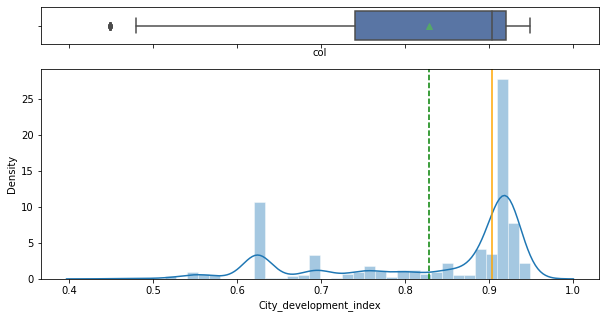

In [ ]:
hist_box('City_development_index')

**Observations:**

* From the above plot, we observe that there are many people from cities having a development index more than 0.9. 

### **Observations on Training Hours**

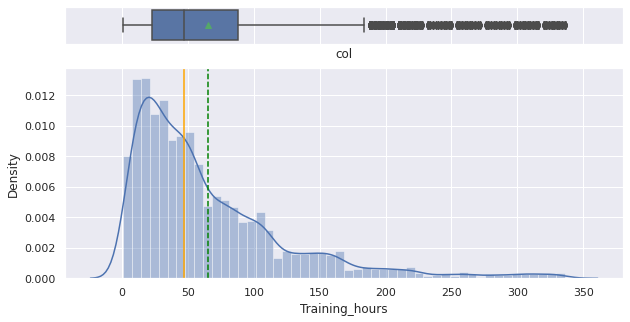

In [ ]:
hist_box('Training_hours')

**Observations:**

* From the plot, we observe that the measures of central tendency with respect to training hours seem to be 70, despite a maximum value of over 300 hours. So most of the people in this dataset have undergone training for less than 100 hours.

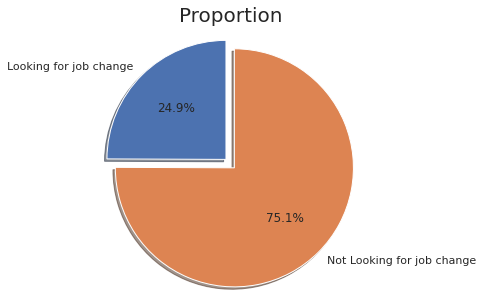

In [ ]:
labels = 'Looking for job change', 'Not Looking for job change'
sizes = [data.Target[data['Target']==1].count(),data.Target[data['Target']==0].count()]

explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion", size = 20)
plt.show()

**Observations:**

* This pie chart shows that the actual distribution of classes is itself imbalanced for the target variable.
* Only ~25% of the employees in this dataset are looking for a job change.

Hence, this dataset and problem statement represent an example of Imbalanced Classification, which has unique challenges in comparison to performing classification over balanced target variables.

## **Bivariate Analysis**

### **Target vs Gender**

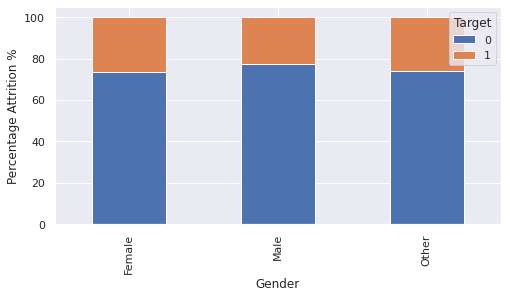

In [ ]:
(pd.crosstab(data['Gender'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* From the above plot, it is observed that the likelihood of the employee choosing a job switch does not depend on their gender.

### **Target vs Relevant_experience**

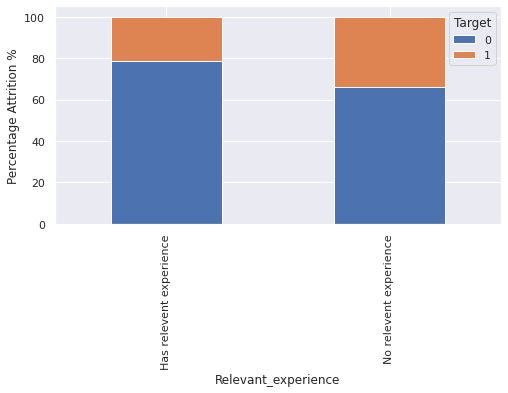

In [ ]:
(pd.crosstab(data['Relevant_experience'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* From the above plot, we see that employees with Non-relevant experience are more likely to be switching their job.

### **Target vs Enrolled_university**

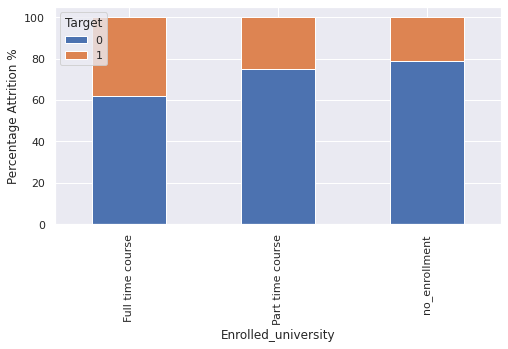

In [ ]:
(pd.crosstab(data['Enrolled_university'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* Employees who have taken full-time courses in universities are the ones who are more likely to be trying to switch jobs.

### **Target vs Education_level**

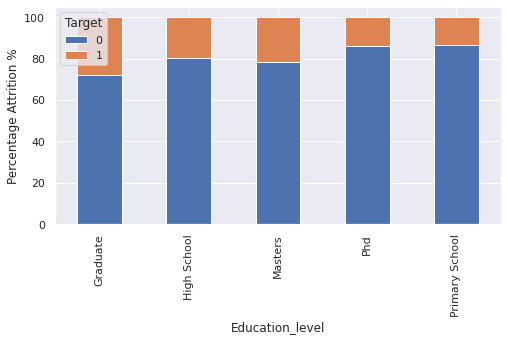

In [ ]:
(pd.crosstab(data['Education_level'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* Employees who completed Graduation and Master's degrees are more likely to be trying to switch jobs. 

### **Target vs Major_discipline**

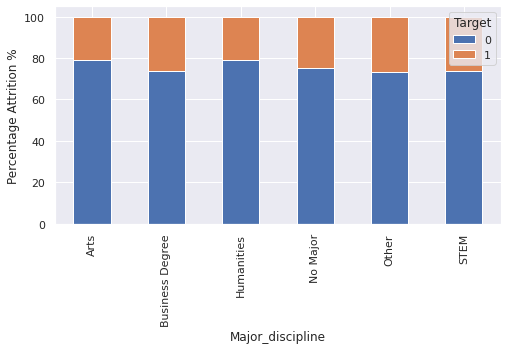

In [ ]:
(pd.crosstab(data['Major_discipline'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* Employees who took STEM or Business Degrees as their major discipline are slightly more likely to change their job.

### **Target vs Experience**

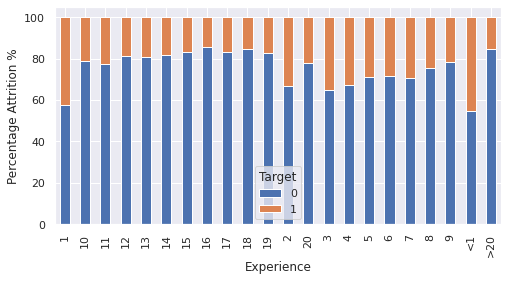

In [ ]:
(pd.crosstab(data['Experience'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* From the above plot, it's clear that employees having a work experience of less than 3 years are trying to switch their jobs.

### **Target vs Last_new_job**

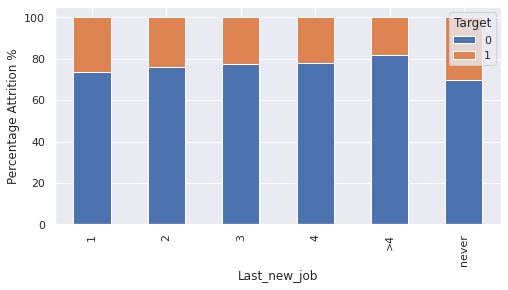

In [ ]:
(pd.crosstab(data['Last_new_job'],data['Target'],normalize='index')*100).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('Percentage Attrition %')
plt.show()

**Observations:**

* Employees who have never switched jobs before are the most likely to be looking for a job change.

## **Data Pre-processing**

In [ ]:
# Dropping these columns as they will not add value to the modeling
data.drop(['Company_size','Gender','City','Enrollee_id'], axis=1, inplace=True)

In [ ]:
# Separating all the categorical columns for imputation
cat_col_df = data.drop(['City_development_index','Training_hours','Target'], axis=1)

In [ ]:
# Separating Independent and Dependent Columns
X = data.drop(['Target'],axis=1)
Y = data[['Target']]

In [ ]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42,stratify = Y)

### **Missing Value Imputation**
* We will impute the missing values in columns using their mode.

In [ ]:
X_train.isnull().sum()

City_development_index       0
Relevant_experience          0
Enrolled_university        317
Education_level            362
Major_discipline          2258
Experience                  50
Company_type              4881
Last_new_job               343
Training_hours               0
dtype: int64

In [ ]:
imputer_mode = SimpleImputer(strategy="most_frequent")
X_train[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]] = imputer_mode.fit_transform(
    X_train[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]])

X_test[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]] = imputer_mode.transform(
    X_test[["Enrolled_university","Education_level","Major_discipline","Experience","Company_type","Last_new_job"]])

In [ ]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

City_development_index    0
Relevant_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64
------------------------------
City_development_index    0
Relevant_experience       0
Enrolled_university       0
Education_level           0
Major_discipline          0
Experience                0
Company_type              0
Last_new_job              0
Training_hours            0
dtype: int64


### **Encoding Categorical Columns**

* We will be using the Label Encoding technique to encode the values of the categorical columns in this dataset.



In [ ]:
# Create the function to fit and transform the label encoder
def label_encode_columns(df, columns):
    encoders = {}
    for col in columns:
        le = LabelEncoder().fit(df[col])
        df[col] = le.transform(df[col])
        encoders[col] = le
    return df, encoders

# Create the function to take in the fitted encoders and transform the scoring dataset
def label_encode_columns_w_fit_encoders(df, columns, encoders):
    for col in columns:
        le = encoders.get(col)
        df[col] = le.transform(df[col])
    return df
 
# Define the columns we want to encode
encode_columns = ['Relevant_experience','Enrolled_university','Education_level','Major_discipline','Experience','Company_type','Last_new_job']
 
# Fit and transform the training dataset, returing both the new training dataset and the fitted encoders to use on the scoring dataset
X_train, encoders = label_encode_columns(df=X_train, columns=encode_columns)
 
# Transform the scoring dataset using the encoders we fit previously
X_test = label_encode_columns_w_fit_encoders(df=X_test, columns=encode_columns, encoders=encoders)

In [ ]:
X_train.head()

,City_development_index,Relevant_experience,Enrolled_university,Education_level,Major_discipline,Experience,Company_type,Last_new_job,Training_hours
17855,0.624,0,2,0,5,1,5,0,90
17664,0.920,1,2,4,5,15,5,5,15
13404,0.896,0,2,0,5,3,2,4,36
13366,0.920,0,2,0,5,15,1,0,53
15670,0.855,0,0,0,5,15,5,0,158


In [ ]:
# Checking the shape of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15326, 9)
(3832, 9)
(15326, 1)
(3832, 1)


## **Model Building**

#### **A model can make wrong predictions in the following ways:**
* Predicting an employee is looking for a job when he/she is not looking for it. 
* Predicting an employee is not looking for a job when he/she is in fact looking for one.

#### **Which case is more important?**

Both cases are actually important for the purposes of this case study. Not giving a chance to a deserving employee (by wrongly classifying them as likely to attrite) might lead to decreased productivity, and the company might lose a good employee affecting the organization's growth. However, giving chances to a non-deserving employees (as they are likely to attrite) would lead to a financial loss for the company, and giving such employees an increased amount of responsibility might again affect the company's growth.

#### **How to reduce this loss i.e need to reduce False Negatives as well as False Positives?**

Since both errors are important for us to minimize, the company would want the F1 Score evaluation metric to be maximized. Hence, the focus should be on increasing the F1 score rather than focusing on just one metric i.e. Recall or Precision.


**Also, let's create a function to calculate and visualize the confusion matrix so that we don't have to rewrite the same code repeatedly for each model.**

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        # Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        # Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        # Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    
    if title:
        plt.title(title)

### **Building Neural Network**

### **Model 1**

In [ ]:
backend.clear_session()

# Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Initializing the ANN
model = Sequential()

# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model.add(Dense(activation = 'relu', input_dim = 9, units=64))

# Adding hidden layer
model.add(Dense(32, activation='relu'))

# Adding the output layer
# Notice that we do not need to specify input dim. 
# We have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
model.add(Dense(1, activation = 'sigmoid')) 

In [ ]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                640       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,753
Trainable params: 2,753
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(X_train, y_train,           
          validation_split=0.2,
          epochs=50,
          batch_size=32,verbose=1)

Epoch 1/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5441 - accuracy: 0.7505 - val_loss: 0.5792 - val_accuracy: 0.7518
Epoch 2/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5437 - accuracy: 0.7508 - val_loss: 0.5408 - val_accuracy: 0.7521
Epoch 3/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5424 - accuracy: 0.7511 - val_loss: 0.5440 - val_accuracy: 0.7531
Epoch 4/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5438 - accuracy: 0.7515 - val_loss: 0.5401 - val_accuracy: 0.7524
Epoch 5/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5439 - accuracy: 0.7513 - val_loss: 0.5799 - val_accuracy: 0.7521
Epoch 6/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5430 - accuracy: 0.7517 - val_loss: 0.5585 - val_accuracy: 0.7518
Epoch 7/50
384/384 [==============================] - 1s 3ms/step - loss: 0.5428 - accuracy: 0.7511 - val_loss: 0.5695 - val_accuracy: 0.7495
Epoch 

120/120 [==============================] - 0s 2ms/step - loss: 0.5364 - accuracy: 0.7516


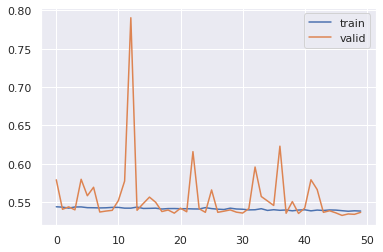

In [ ]:
# Capturing learning history per epoch
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

# Printing results
results = model.evaluate(X_test, y_test)

**Observations:**

- There is noise in the loss behavior here. Sometimes, the loss function fluctuates a lot during training, which makes the convergence slow.These fluctuations are due to the nature of Stochastic Gradient Descent that produces noisy updates in the parameters. 

**Let's check the other metrics.**

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

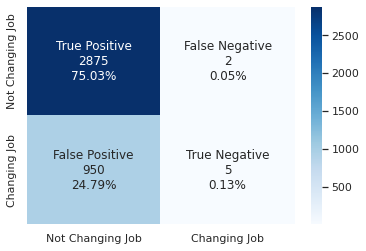

In [ ]:
# Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Observations:**

- The 0.05 percent of False Negatives is due to the model's threshold of 0.5 and as this is an imbalanced dataset, we should calculate the threshold using the AUC-ROC curve. 

In [ ]:
# Classification report 

from sklearn import metrics
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2877
           1       0.71      0.01      0.01       955

    accuracy                           0.75      3832
   macro avg       0.73      0.50      0.43      3832
weighted avg       0.74      0.75      0.65      3832



As you can see, the above model has good accuracy but a poor F1-score. This could be due to the imbalanced dataset. We observe that the False positive rates are also high, which should be considerably lower. 

1) **Imbalanced dataset**: As you have seen in the EDA, this dataset is imbalanced, and it contains more examples that belong to the **0** class.

2) **Decision Threshold**: Due to the imbalanced dataset, we can use ROC-AUC to find the optimal threshold and use the same for prediction.


**Let's try to change the optimizer, tune the decision threshold, increase the layers and configure some other hyperparameters accordingly, in order to improve the model's performance.**

### **Model 2**

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model1 = Sequential()

# Adding the hidden and output layers
model1.add(Dense(256,activation='relu',kernel_initializer='he_uniform',input_dim = X_train.shape[1]))
model1.add(Dense(128,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model1.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN with Adam optimizer and binary cross entropy loss function 
optimizer = tf.keras.optimizers.Adam(0.001)
model1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 45,825
Trainable params: 45,825
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model1.fit(X_train,y_train,batch_size=64,epochs=50,verbose=1,validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 1s 4ms/step - loss: 1.2938 - accuracy: 0.6868 - val_loss: 0.6469 - val_accuracy: 0.6155
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6944 - accuracy: 0.7125 - val_loss: 0.5464 - val_accuracy: 0.7528
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6645 - accuracy: 0.7178 - val_loss: 0.6192 - val_accuracy: 0.7511
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.6088 - accuracy: 0.7277 - val_loss: 0.5702 - val_accuracy: 0.7211
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5810 - accuracy: 0.7351 - val_loss: 0.6151 - val_accuracy: 0.7511
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5763 - accuracy: 0.7366 - val_loss: 0.6041 - val_accuracy: 0.7502
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5796 - accuracy: 0.7369 - val_loss: 0.5386 - val_accuracy: 0.7511
Epoch 

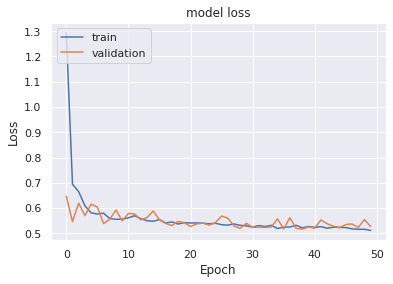

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])

plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- We can see smoother loss curves for both train and validation as we increase the depth of the neural network and change the optimizer to Adam.

Best Threshold=0.182898, G-Mean=0.672


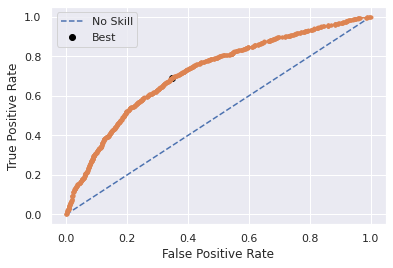

In [ ]:
# Predict probabilities
yhat1 = model1.predict(X_test)

# Keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]

# Calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)

# Calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))

# Plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# Show the plot
pyplot.show()

**Let's tune the threshold using ROC-AUC**

There are many ways we could locate the threshold with the optimal balance between false positive and true positive rates. 

Firstly, the true positive rate is called the Sensitivity. The inverse of the false-positive rate is called the Specificity.

**Sensitivity = True Positive / (True Positive + False Negative)**

**Specificity = True Negative / (False Positive + True Negative)**

Where:

Sensitivity = True Positive Rate

Specificity = 1 – False Positive Rate

The Geometric Mean or G-Mean is a metric for imbalanced classification that, if optimized, will seek a balance between the sensitivity and the specificity.

**G-Mean = sqrt(Sensitivity * Specificity)**

One approach would be to test the model with each threshold returned from the call roc_auc_score(),and select the threshold with the **largest G-Mean value.**

In [ ]:
# Predicting the results using best as a threshold
y_pred_e1 = model1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

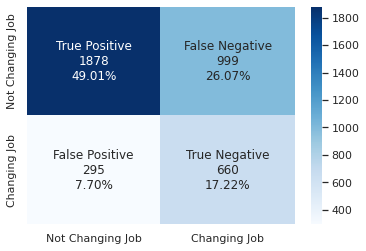

In [ ]:
# Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Changing Job','Changing Job']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Classification report 
from sklearn import metrics
cr = metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.86      0.65      0.74      2877
           1       0.40      0.69      0.50       955

    accuracy                           0.66      3832
   macro avg       0.63      0.67      0.62      3832
weighted avg       0.75      0.66      0.68      3832



- As the number of layers in the neural network has increased, we can see that the macro F1 score has increased, and the False Negative percentage has decreased. 

**Now let's try to use the Batch Normalization technique and check to see if we can increase the F1 score.**

### **Model 3**

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model2 = Sequential()
model2.add(Dense(128,activation='relu',input_dim = X_train.shape[1]))
model2.add(BatchNormalization())
model2.add(Dense(64,activation='relu',kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1280      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 3

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_2 = model2.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 4s 10ms/step - loss: 0.5691 - accuracy: 0.7411 - val_loss: 0.5559 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 7ms/step - loss: 0.5461 - accuracy: 0.7472 - val_loss: 0.5360 - val_accuracy: 0.7531
Epoch 3/50
192/192 [==============================] - 2s 8ms/step - loss: 0.5294 - accuracy: 0.7520 - val_loss: 0.5203 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 2s 8ms/step - loss: 0.5120 - accuracy: 0.7624 - val_loss: 0.5223 - val_accuracy: 0.7518
Epoch 5/50
192/192 [==============================] - 2s 9ms/step - loss: 0.5066 - accuracy: 0.7629 - val_loss: 0.5243 - val_accuracy: 0.7655
Epoch 6/50
192/192 [==============================] - 1s 7ms/step - loss: 0.5052 - accuracy: 0.7589 - val_loss: 0.5201 - val_accuracy: 0.7590
Epoch 7/50
192/192 [==============================] - 1s 7ms/step - loss: 0.5031 - accuracy: 0.7612 - val_loss: 0.5200 - val_accuracy: 0.7479
Epoch

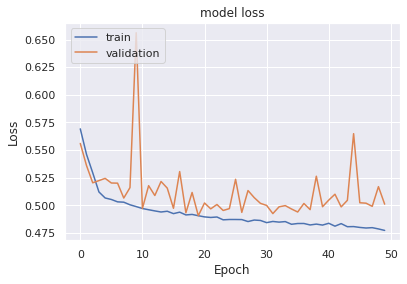

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])

plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- Unfortunately, the above plot shows that the model contains a lot of noise, and it appears to have overfitted on the training data, as there is a significant difference in performance between train and validation.

Best Threshold=0.209941, G-Mean=0.700


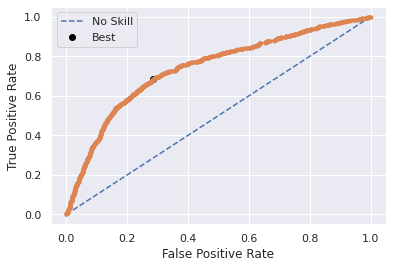

In [ ]:
# Predict probabilities
yhat2 = model2.predict(X_test)

# Keep probabilities for the positive outcome only
yhat2 = yhat2[:, 0]

# Calculate roc curves
fpr, tpr, thresholds2 = roc_curve(y_test, yhat2)

# Calculate the g-mean for each threshold
gmeans2 = np.sqrt(tpr * (1-fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans2)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds2[ix], gmeans2[ix]))

# Plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# Show the plot
pyplot.show()

In [ ]:
y_pred_e2 = model2.predict(X_test)
y_pred_e2 = (y_pred_e2 > thresholds2[ix])
y_pred_e2

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

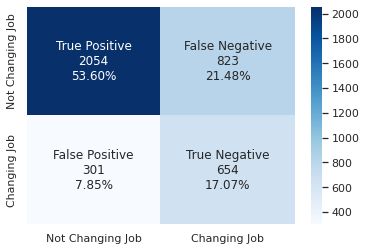

In [ ]:
# Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test, y_pred_e2)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Classification report 

from sklearn import metrics
cr2 = metrics.classification_report(y_test,y_pred_e2)
print(cr2)

              precision    recall  f1-score   support

           0       0.87      0.71      0.79      2877
           1       0.44      0.68      0.54       955

    accuracy                           0.71      3832
   macro avg       0.66      0.70      0.66      3832
weighted avg       0.77      0.71      0.72      3832



- The Train and Validation curves seem to show overfitting despite having a good F1 score and a low False Negative rate. 

**Let's try to use the Dropout technique and check to see if it can reduce the False Negative rate.** 

### **Model 4**

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model3 = Sequential()
model3.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
model3.add(Dropout(0.2))
model3.add(Dense(128,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(32,activation='relu'))
model3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2560      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

In [ ]:
optimizer = tf.keras.optimizers.Adam(0.001)
model3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history_3 = model3.fit(X_train, y_train, batch_size=64, epochs=50, verbose=1, validation_split = 0.2)

Epoch 1/50
192/192 [==============================] - 3s 8ms/step - loss: 0.6612 - accuracy: 0.7195 - val_loss: 0.5787 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5794 - accuracy: 0.7491 - val_loss: 0.5696 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5700 - accuracy: 0.7498 - val_loss: 0.5610 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5630 - accuracy: 0.7502 - val_loss: 0.5566 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5602 - accuracy: 0.7501 - val_loss: 0.5551 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5584 - accuracy: 0.7503 - val_loss: 0.5530 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 6ms/step - loss: 0.5551 - accuracy: 0.7504 - val_loss: 0.5449 - val_accuracy: 0.7515
Epoch 

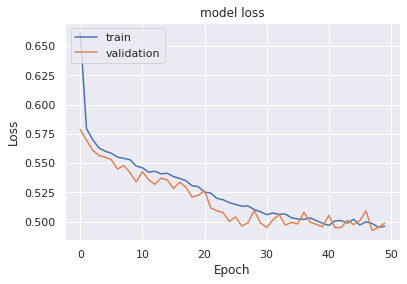

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])

plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- From the above plot, we observe that both the curves - train and validation are smooth.

Best Threshold=0.229962, G-Mean=0.705


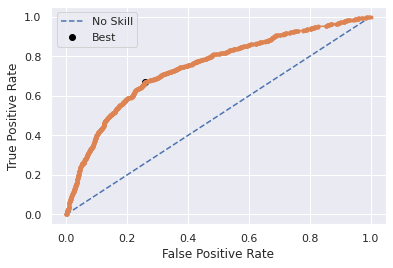

In [ ]:
# Predict probabilities
yhat3 = model3.predict(X_test)

# Keep probabilities for the positive outcome only
yhat3 = yhat3[:, 0]

# Calculate roc curves
fpr, tpr, thresholds3 = roc_curve(y_test, yhat3)

# Calculate the g-mean for each threshold
gmeans3 = np.sqrt(tpr * (1-fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans3)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds3[ix], gmeans3[ix]))

# Plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# Show the plot
pyplot.show()

In [ ]:
y_pred_e3 = model3.predict(X_test)
y_pred_e3 = (y_pred_e3 > thresholds3[ix])
y_pred_e3

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [False],
       [False]])

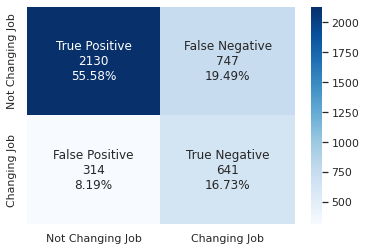

In [ ]:
# Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_test, y_pred_e3)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = ['Not Changing Job','Changing Job']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Classification report 

from sklearn import metrics
cr3 = metrics.classification_report(y_test,y_pred_e3)
print(cr3)

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2877
           1       0.46      0.67      0.55       955

    accuracy                           0.72      3832
   macro avg       0.67      0.71      0.67      3832
weighted avg       0.77      0.72      0.74      3832



**Observations:**

- The Dropout technique helped the model reduce the loss function of both train and validation. The F1 score also seems to be fine, with a decrease in the False Negative rate.

## **Additional Content (Optional)**
Now, let's try to use some of the Hyperparameter Optimization techniques such as RandomizedSearchCV and Keras Tuner to increase the F1 score of the model.

### **Model 5**

#### **Random Search CV**

Some important hyperparameters to look out for while optimizing neural networks are:

* Type of Architecture

* Number of Layers

* Number of Neurons in a layer

* Regularization hyperparameters

* Learning Rate

* Type of Optimizer

* Dropout Rate

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(lr,batch_size):  
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(256,activation='relu',input_dim = X_train.shape[1]))
    model.add(Dropout(0.3))
    model.add(Dense(128,activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32,activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))

    # Compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = 'binary_crossentropy', metrics = ['accuracy'])
    return model

We are using Random search to optimize two hyperparameters - **Batch size** & **Learning Rate**.

You can also optimize other hyperparameters as mentioned above.



In [ ]:
keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1)

# Define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.1,0.001],}

kfold_splits = 3
random = RandomizedSearchCV(estimator=keras_estimator,  
                    verbose=1,
                    cv=kfold_splits,  
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(X_train, y_train,validation_split=0.2,verbose=1) 

# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']

Fitting 3 folds for each of 9 candidates, totalling 27 fits
384/384 [==============================] - 2s 4ms/step - loss: 0.6437 - accuracy: 0.7430 - val_loss: 0.5660 - val_accuracy: 0.7515
Best: 0.750620 using {'lr': 0.01, 'batch_size': 32}


The best model is with the following configuration: 

( It may vary each time the code runs ) 

**Result of Random Search**

{'batch_size': 32, 'learning_rate": 0.01}

Let's create the final model with the above mentioned configuration.

In [ ]:
estimator_v4 = create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

estimator_v4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               2560      
                                                                 
 dropout_3 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 32)               

In [ ]:
optimizer = tf.keras.optimizers.Adam(random_result.best_params_['lr'])
estimator_v4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])
history_4 = estimator_v4.fit(X_train, y_train, epochs=50, batch_size = 64, verbose=1,validation_split=0.2)

Epoch 1/50
192/192 [==============================] - 1s 5ms/step - loss: 0.6610 - accuracy: 0.7387 - val_loss: 0.5622 - val_accuracy: 0.7515
Epoch 2/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5627 - accuracy: 0.7504 - val_loss: 0.5536 - val_accuracy: 0.7515
Epoch 3/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5579 - accuracy: 0.7504 - val_loss: 0.5510 - val_accuracy: 0.7515
Epoch 4/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5544 - accuracy: 0.7504 - val_loss: 0.5450 - val_accuracy: 0.7515
Epoch 5/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5531 - accuracy: 0.7503 - val_loss: 0.5417 - val_accuracy: 0.7515
Epoch 6/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5590 - accuracy: 0.7503 - val_loss: 0.5491 - val_accuracy: 0.7515
Epoch 7/50
192/192 [==============================] - 1s 4ms/step - loss: 0.5583 - accuracy: 0.7491 - val_loss: 0.5477 - val_accuracy: 0.7515
Epoch 

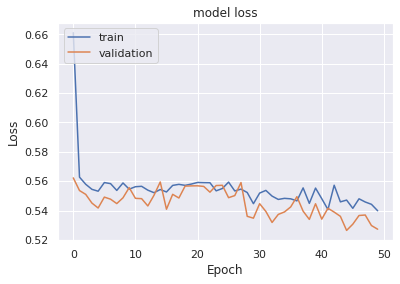

In [ ]:
# Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])

plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations:**

- From the above plot, we observe that there is a noise in the training behavior of the model.

Best Threshold=0.287153, G-Mean=0.662


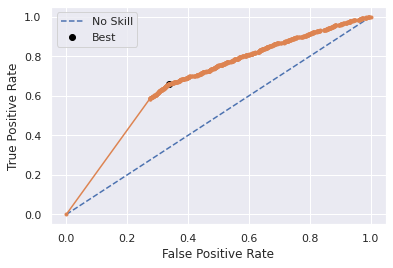

In [ ]:
# Predict probabilities
yhat4 = estimator_v4.predict(X_test)

# Keep probabilities for the positive outcome only
yhat4 = yhat4[:, 0]

# Calculate roc curves
fpr, tpr, thresholds4 = roc_curve(y_test, yhat4)

# Calculate the g-mean for each threshold
gmeans4 = np.sqrt(tpr * (1-fpr))

# Locate the index of the largest g-mean
ix = np.argmax(gmeans4)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds4[ix], gmeans4[ix]))

# Plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')

# Axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

# Show the plot
pyplot.show()

In [ ]:
y_pred_e4 = estimator_v4.predict(X_test)
y_pred_e4 = (y_pred_e4 > thresholds4[ix])
y_pred_e4

array([[False],
       [ True],
       [False],
       ...,
       [ True],
       [ True],
       [False]])

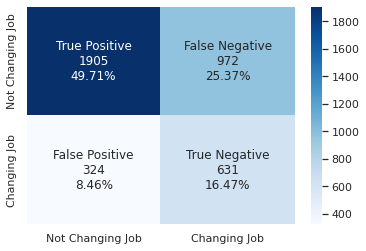

In [ ]:
# Calculating the confusion matrix 
from sklearn.metrics import confusion_matrix

cm4 = confusion_matrix(y_test, y_pred_e4)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Changing Job','Changing Job']
make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

In [ ]:
# Classification report 
from sklearn import metrics
cr4 = metrics.classification_report(y_test,y_pred_e4)
print(cr4)

              precision    recall  f1-score   support

           0       0.85      0.66      0.75      2877
           1       0.39      0.66      0.49       955

    accuracy                           0.66      3832
   macro avg       0.62      0.66      0.62      3832
weighted avg       0.74      0.66      0.68      3832



**Observations:**

- Hyperparameter tuning is used here to get a better F1 score, but the F1 score may differ each time. 

- Other hyperparameters can also be tuned to get better performance on the metrics. 

- Here, the F1 score of the model has decreased in comparison to the previous best performance, as Random Search CV will choose the hyperparameters randomly, and hence has a very low chance of finding a highly optimal configuration. 

- So, our final model here can be **Model 4**, which uses the Dropout regularization technique and works on the imbalanced dataset.

### **Business Recommendations**

* The HR department of the company can deploy the final model from this exercise to identify with a reasonable degree of accuracy whether an employee is likely to switch jobs or not, and this process seems to be easier and more time-efficient than other methods.

We encourage you to further look to optimize the model and come up with better results.

**Happy Learning!**